In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
# Shows plots in jupyter notebook
#%matplotlib inline
import tensorflow 
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras import optimizers
import math
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_classif
import keras.callbacks
from sklearn.metrics import classification_report
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import PCA
import joblib
from os.path import exists
from keras.models import load_model
from sklearn.utils import class_weight
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import schedules
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from keras.optimizers import schedules
from tensorflow.keras.callbacks import ModelCheckpoint
import joblib
from sklearn.model_selection import StratifiedShuffleSplit
import datetime


In [50]:
df = pd.read_csv("Daten\Hotel_Reservations.csv")

In [4]:
df.head().style.set_properties(**{'background-color': 'lightblue',
                           'color': 'black',
                           'border-color': 'darkblack'})

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.000000,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.680000,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.000000,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.000000,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.500000,0,Canceled


In [67]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["booking_status"]):
    X_train = df.iloc[train_index]
    X_test = df.iloc[test_index]

In [6]:
display(X_train.shape)
display(X_train.size)

(29020, 19)

551380

In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29020 entries, 9078 to 29823
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            29020 non-null  object 
 1   no_of_adults                          29020 non-null  int64  
 2   no_of_children                        29020 non-null  int64  
 3   no_of_weekend_nights                  29020 non-null  int64  
 4   no_of_week_nights                     29020 non-null  int64  
 5   type_of_meal_plan                     29020 non-null  object 
 6   required_car_parking_space            29020 non-null  int64  
 7   room_type_reserved                    29020 non-null  object 
 8   lead_time                             29020 non-null  int64  
 9   arrival_year                          29020 non-null  int64  
 10  arrival_month                         29020 non-null  int64  
 11  arrival_date

In [8]:
X_train.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000
mean,1.846623,0.104859,0.810855,2.203308,0.031496,85.127016,2017.820193,7.431978,15.580875,0.025775,0.022674,0.157960,103.533282,0.620331
std,0.518991,0.402785,0.871787,1.415096,0.174656,85.921809,0.384033,3.070065,8.728470,0.158467,0.368525,1.796362,35.147072,0.788429
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.492500,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.900000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.600000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [9]:
X_train.nunique()

Booking_ID                              29020
no_of_adults                                5
no_of_children                              6
no_of_weekend_nights                        8
no_of_week_nights                          18
type_of_meal_plan                           4
required_car_parking_space                  2
room_type_reserved                          7
lead_time                                 349
arrival_year                                2
arrival_month                              12
arrival_date                               31
market_segment_type                         5
repeated_guest                              2
no_of_previous_cancellations                9
no_of_previous_bookings_not_canceled       56
avg_price_per_room                       3489
no_of_special_requests                      6
booking_status                              2
dtype: int64

In [39]:
X_train.isnull().mean()*100

Booking_ID                              0.0
no_of_adults                            0.0
no_of_children                          0.0
no_of_weekend_nights                    0.0
no_of_week_nights                       0.0
type_of_meal_plan                       0.0
required_car_parking_space              0.0
room_type_reserved                      0.0
lead_time                               0.0
arrival_year                            0.0
arrival_month                           0.0
arrival_date                            0.0
market_segment_type                     0.0
repeated_guest                          0.0
no_of_previous_cancellations            0.0
no_of_previous_bookings_not_canceled    0.0
avg_price_per_room                      0.0
no_of_special_requests                  0.0
booking_status                          0.0
dtype: float64

In [19]:
X_train["type_of_meal_plan"].value_counts()

Meal Plan 1     22241
Not Selected     4117
Meal Plan 2      2657
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

In [20]:
X_train["room_type_reserved"].value_counts()

Room_Type 1    22498
Room_Type 4     4862
Room_Type 6      764
Room_Type 2      546
Room_Type 5      222
Room_Type 7      123
Room_Type 3        5
Name: room_type_reserved, dtype: int64

In [21]:
X_train["market_segment_type"].value_counts()

Online           18610
Offline           8381
Corporate         1612
Complementary      314
Aviation           103
Name: market_segment_type, dtype: int64

In [167]:
all_features = list(df.columns[0:-1])
categorical_features = ["type_of_meal_plan", "room_type_reserved", "market_segment_type"]
numerical_features = [x for x in all_features if x not in categorical_features]

In [14]:
X_train["booking_status"].value_counts()

Not_Canceled    19512
Canceled         9508
Name: booking_status, dtype: int64

([<matplotlib.patches.Wedge at 0x1e5221868b0>,
 [Text(-0.5669614309335993, 0.9426318135060612, 'Not_Canceled'),
  Text(0.5669614309335992, -0.9426318135060612, 'Canceled')],
 [Text(-0.30925168960014504, 0.5141628073669424, '67.2%'),
  Text(0.309251689600145, -0.5141628073669424, '32.8%')])

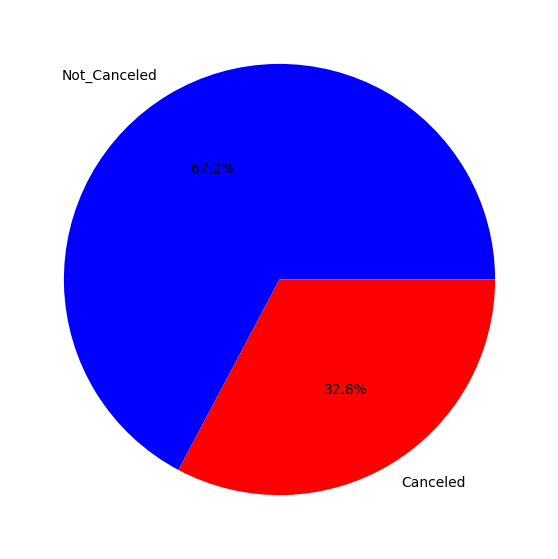

In [16]:
plt.figure(figsize=(7,7))
plt.pie(df["booking_status"].value_counts(), labels = ["Not_Canceled","Canceled"], colors= ['blue','red'],autopct='%3.1f%%')

In [193]:
df_EDA = pd.DataFrame(X_train)

encoding of objective values to categorical

Plot that show each categorical value with division

histogramm of numerical values

plot each categorical value to canceled or not

date encoden und plottenmit status

In [195]:
df_EDA['arrival_date']=df_EDA.apply(lambda row: 28 if (row['arrival_month'] == 2 and row['arrival_date'] > 28) else row['arrival_date'], axis=1)
df_EDA['complete_arrival_date']=df_EDA.apply(lambda x: datetime.date(x['arrival_year'], x['arrival_month'], x['arrival_date']), axis=1)

In [133]:
df_EDA['complete_arrival_date']=df_EDA.apply(lambda x: datetime.date(x['arrival_year'], x['arrival_month'],1), axis=1)

correlation between lead time and price 

<AxesSubplot: xlabel='lead_time', ylabel='avg_price_per_room'>

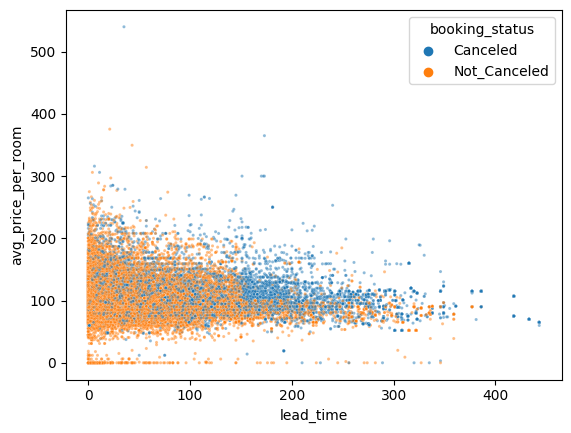

In [85]:
sns.scatterplot(data=df_EDA, x="lead_time", y="avg_price_per_room", hue="booking_status",s=5,alpha=0.5)

In [148]:
df_EDA['overall_price'] = df_EDA['avg_price_per_room'] * (df_EDA['no_of_weekend_nights'] + df_EDA['no_of_week_nights'])

In [199]:
df_EDA['overall_people'] = df_EDA['no_of_children'] + df_EDA['no_of_adults']

<AxesSubplot: xlabel='overall_people', ylabel='overall_price'>

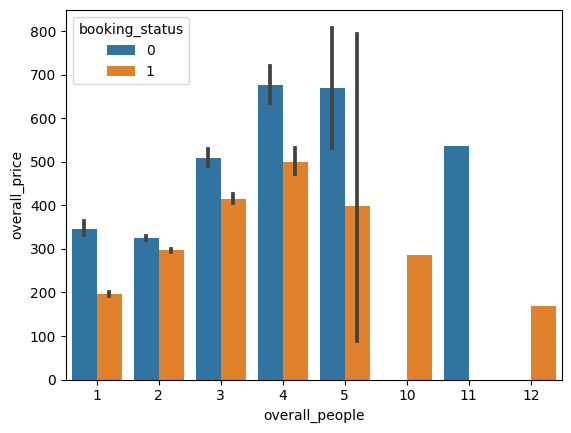

In [153]:
sns.barplot(data=df_EDA, x='overall_people', y='overall_price', hue="booking_status")

In [192]:
df_EDA['average_price_per_room_person'] = df_EDA['avg_price_per_room'] / df_EDA['overall_people']

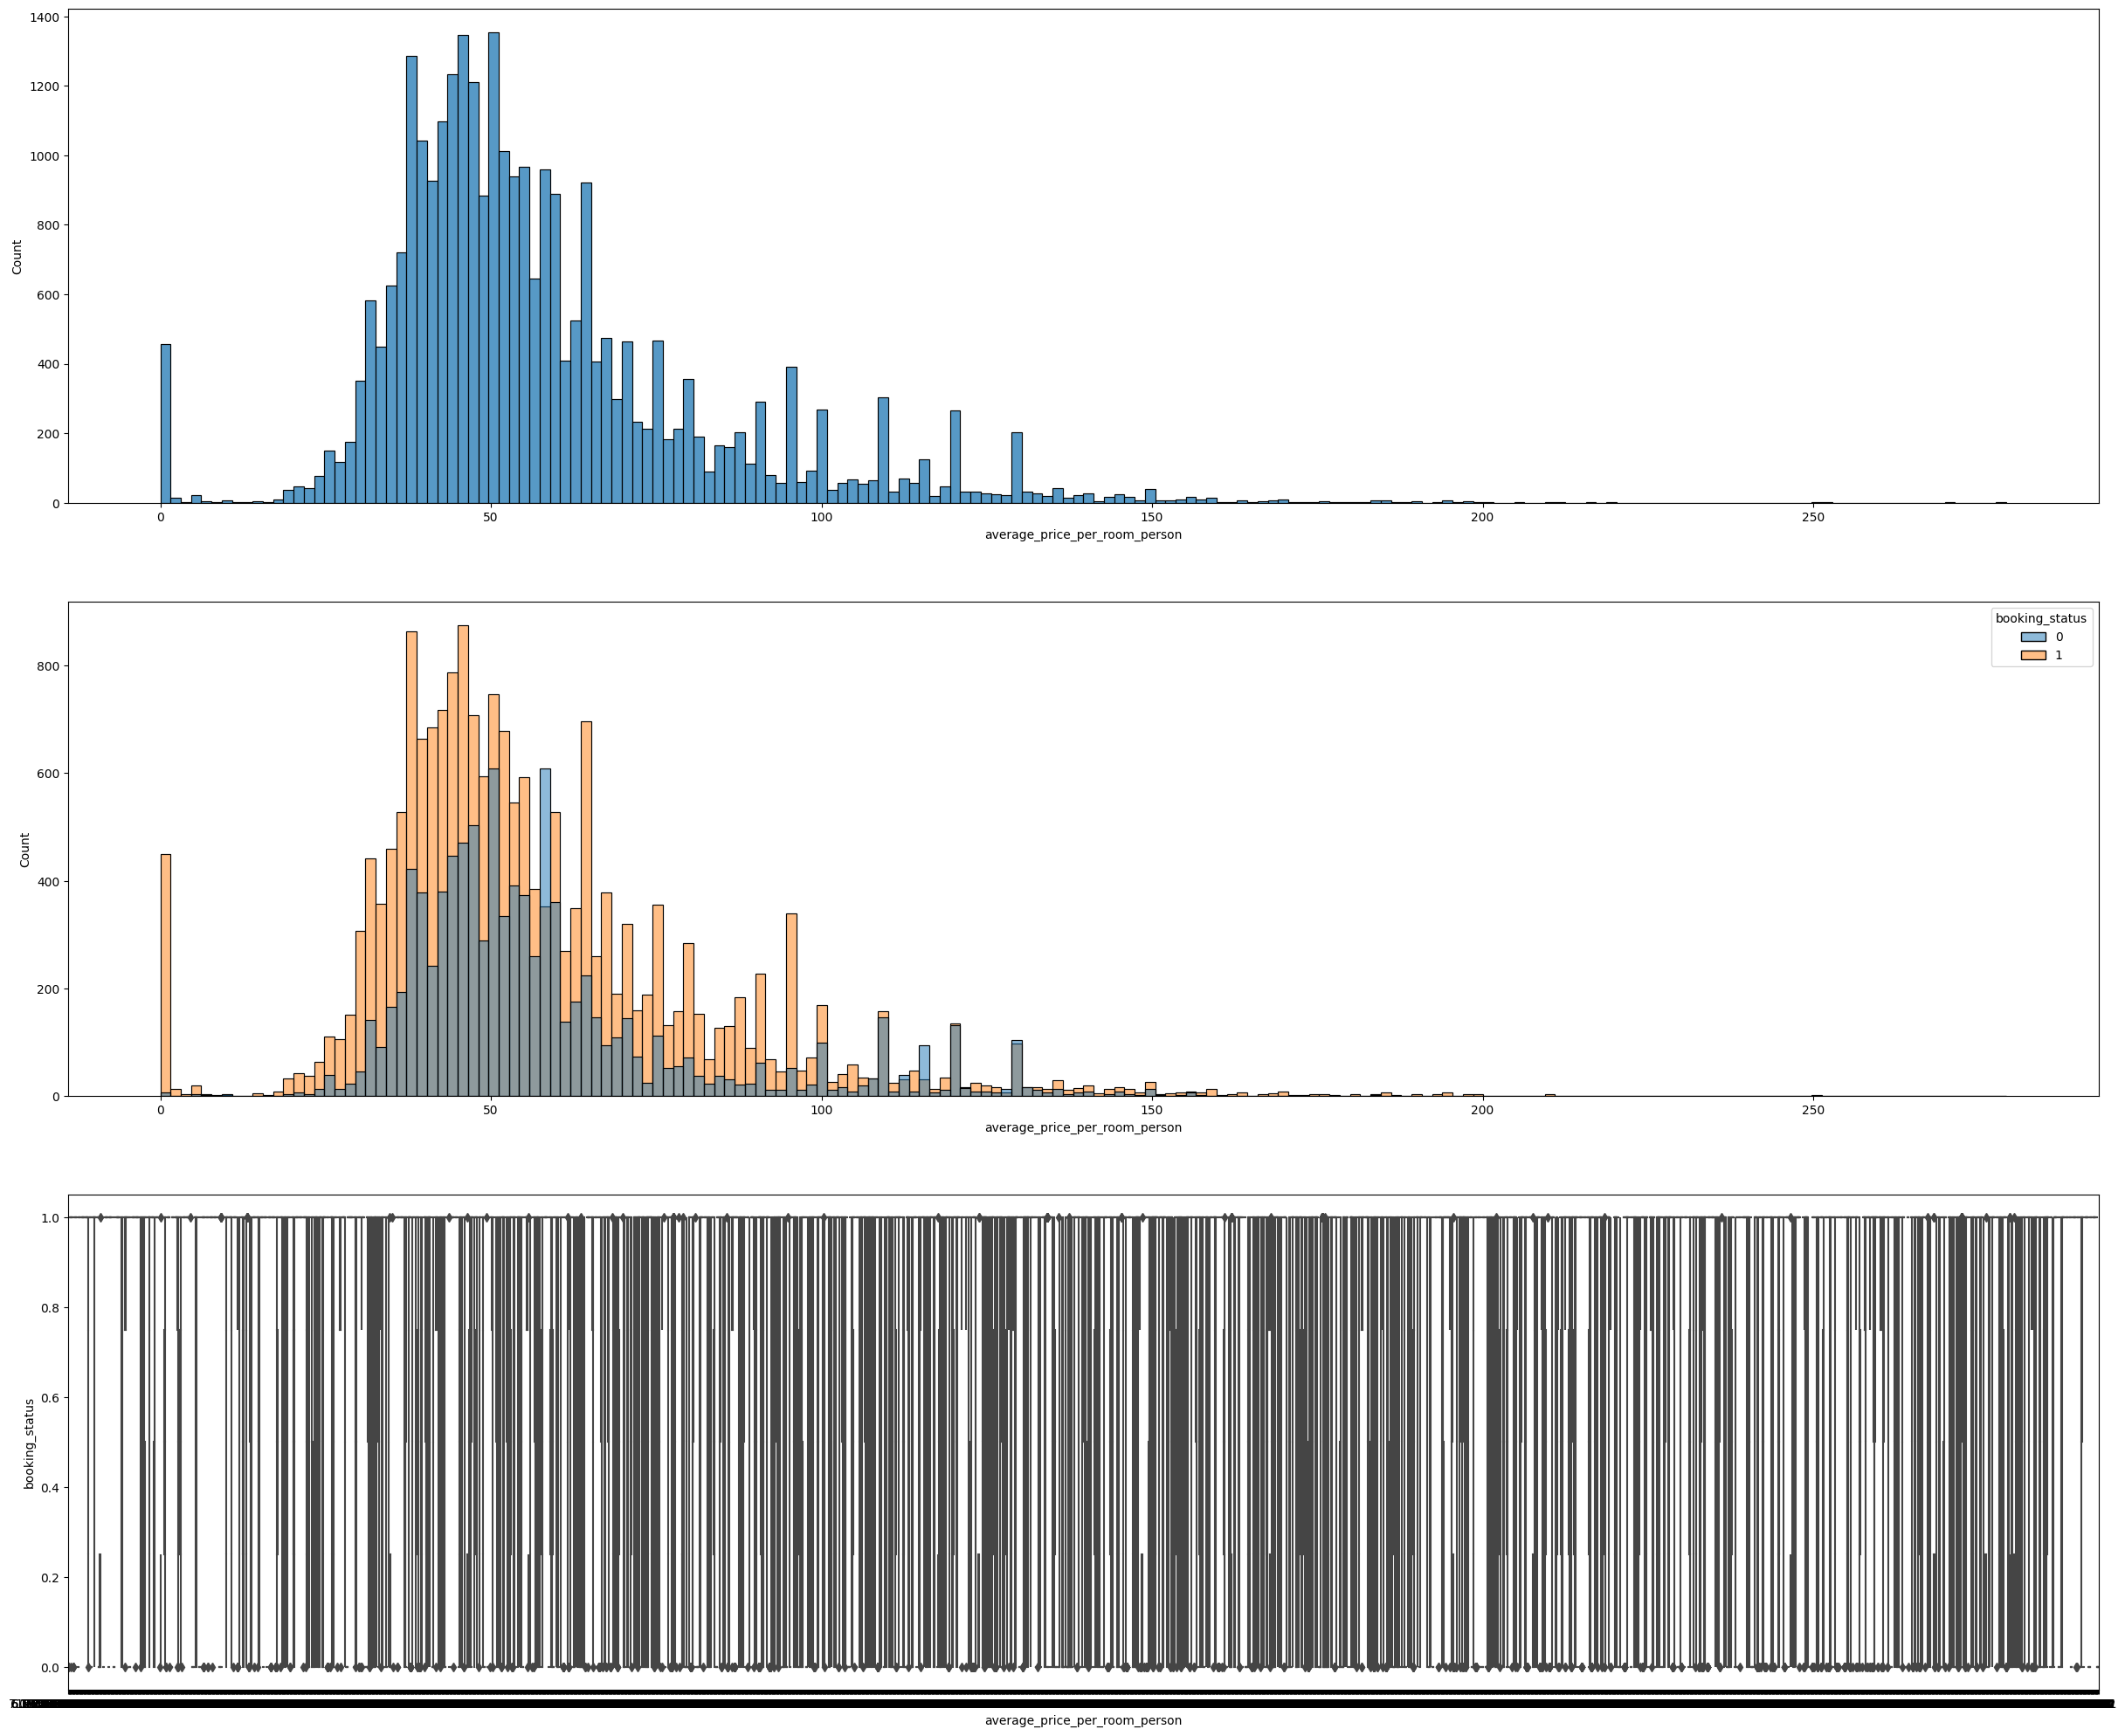

In [163]:
fig, ax = plt.subplots(3, figsize=(30, 25))

t = sns.histplot(data=df_EDA, x='average_price_per_room_person', ax=ax[0])
t = sns.histplot(data=df_EDA, x='average_price_per_room_person', ax=ax[1], hue="booking_status")
t = sns.boxplot(x='average_price_per_room_person', y="booking_status", data=df_EDA, ax=ax[2])

df_EDA['booking_status']=pd.factorize(df_EDA.booking_status)[0]
df_EDA['booking_status']

In [196]:

# Add a column with the count of cancellations per date
df_EDA["count"] = 1
cancelled_df = df_EDA[df_EDA["booking_status"]=="Canceled"].groupby("complete_arrival_date")["count"].sum()
#cancelled_df =pd.DataFrame(cancelled_df)
not_cancelled_df = df_EDA[df_EDA["booking_status"]=="Not_Canceled"].groupby("complete_arrival_date")["count"].sum()
#not_cancelled_df =pd.DataFrame(not_cancelled_df)


# Create a new dataframe with the ratio of cancelled bookings
result = pd.concat([cancelled_df, not_cancelled_df], axis=1)
result.columns = ['not_canceled', 'canceled']
result['canceled'].fillna(1)
result["ratio"] = result["not_canceled"] / result["canceled"]
result =pd.DataFrame(result)

<AxesSubplot: xlabel='complete_arrival_date', ylabel='not_canceled'>

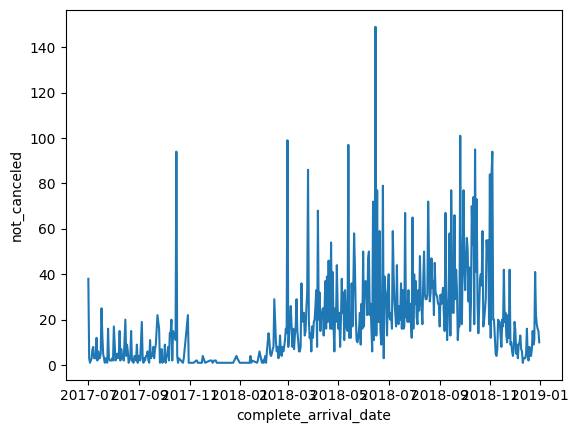

In [197]:
sns.lineplot(data=result, x="complete_arrival_date", y="not_canceled")

<AxesSubplot: xlabel='complete_arrival_date', ylabel='cancelled'>

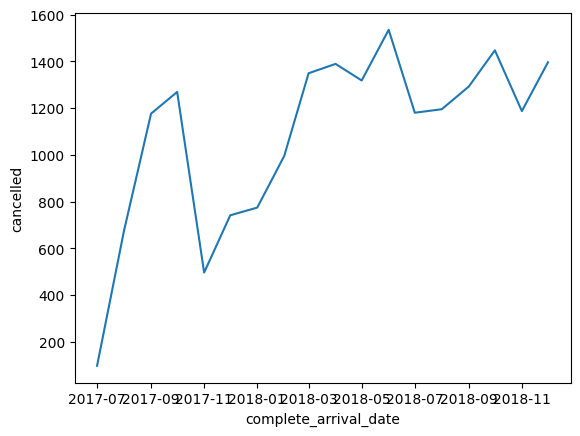

In [145]:
sns.lineplot(data=result, x="complete_arrival_date", y="canceled")

<AxesSubplot: xlabel='complete_arrival_date', ylabel='ratio'>

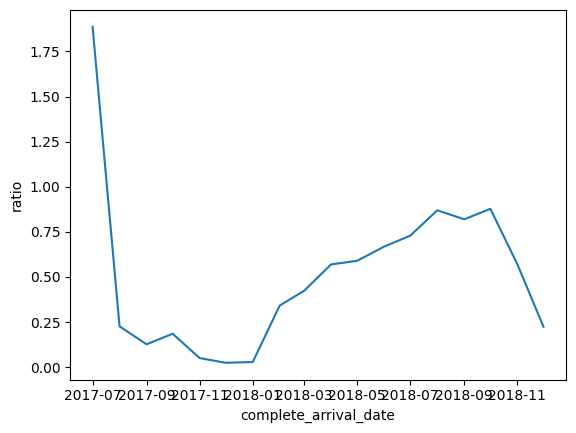

In [141]:
sns.lineplot(data=result, x="complete_arrival_date", y="ratio")

In [181]:
def plot_categorical_features(df, categorical_features, independent_variable, n, m):
    axes = []
    for i in range(m*n):
        axes.append(None)
    for j in range(1, n+1):
        k=0
        for k in range(1, m+1):
            for i in range(1, n*m+1):
                axes[i] = sns.countplot(x =categorical_features[i], data= df, hue= independent_variable, ax= ax[n,m], palette= 'bone')
                axes[i].set(xlabel = categorical_features[i])

In [190]:
def plot_categorical_features(df, categorical_features, independent_variable, n, m):
    for i, col in enumerate(categorical_features):
        plt.subplot(n, m, i+1)
        sns.countplot(x =categorical_features[i], data= df, hue= independent_variable)
    plt.show()

<Figure size 640x480 with 0 Axes>

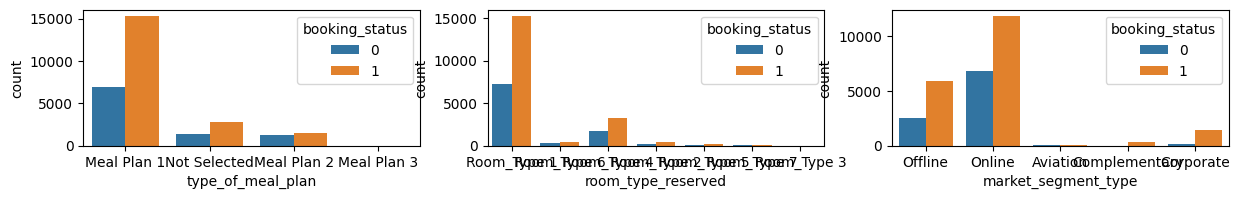

In [191]:
plt.figure()
plt.figure(figsize=(20,6))
plot_categorical_features(df_EDA, categorical_features, "booking_status", 3, 4)

In [ ]:
fig, ax = plt.subplots(6, 3, figsize = (20, 15))


plt.suptitle('Count plot for various categorical features', fontsize = 30, color= 'teal')

ax1 = sns.countplot(x ='PhoneService', data= df, hue= 'Churn', ax= ax[0, 0], palette= 'bone')
ax1.set(xlabel = 'Phone Service')

ax2 = sns.countplot(x ='MultipleLines', data= df, hue= 'Churn', ax= ax[0, 1], palette= 'bone')
ax2.set(xlabel = 'MultipleLines')

ax3 = sns.countplot(x ='InternetService', data= df, hue= 'Churn', ax= ax[0, 2], palette= 'bone')
ax3.set(xlabel = 'Internet Service')

ax4 = sns.countplot(x ='OnlineSecurity', data= df, hue= 'Churn', ax= ax[1, 0], palette= 'bone')
ax4.set(xlabel = 'Online Security')

ax5 = sns.countplot(x ='OnlineBackup', data= df, hue= 'Churn', ax= ax[1, 1], palette= 'bone')
ax5.set(xlabel = 'Online Backup')

ax6 = sns.countplot(x ='DeviceProtection', data= df, hue= 'Churn', ax= ax[1, 2], palette= 'bone')
ax6.set(xlabel = 'Device Protection')

ax7 = sns.countplot(x ='TechSupport', data= df, hue= 'Churn', ax= ax[2, 0], palette= 'bone')
ax7.set(xlabel = 'Tech support')

ax8 = sns.countplot(x ='StreamingTV', data= df, hue= 'Churn', ax= ax[2, 1], palette= 'bone')
ax8.set(xlabel = 'Streaming TV')

ax9 = sns.countplot(x ='StreamingMovies', data= df, hue= 'Churn', ax= ax[2, 2], palette= 'bone')
ax9.set(xlabel = 'Streaming Movies')

ax9 = sns.countplot(x ='Contract', data= df, hue= 'Churn', ax= ax[3, 0], palette= 'bone')
ax9.set(xlabel = 'Contract')

ax10 = sns.countplot(x ='PaperlessBilling', data= df, hue= 'Churn', ax= ax[3, 1], palette= 'bone')
ax10.set(xlabel = 'PaperlessBilling')

ax11 = sns.countplot(x ='PaymentMethod', data= df, hue= 'Churn', ax= ax[3, 2], palette= 'bone')
ax11.set(xlabel = 'PaymentMethod')

ax12 = sns.countplot(x ='gender', data= df, hue= 'Churn', ax= ax[4, 0], palette= 'bone')
ax12.set(xlabel = 'gender')

ax13 = sns.countplot(x ='SeniorCitizen', data= df, hue= 'Churn', ax= ax[4, 1], palette= 'bone')
ax13.set(xlabel = 'eniorCitizen')

ax14 = sns.countplot(x ='Partner', data= df, hue= 'Churn', ax= ax[4, 2], palette= 'bone')
ax14.set(xlabel = 'Partner')

ax15 = sns.countplot(x ='Dependents', data= df, hue= 'Churn', ax= ax[5, 0], palette= 'bone')
ax15.set(xlabel = 'Dependents')


plt.tight_layout()
plt.show()

In [200]:
df_EDA.agg(
    {
       "avg_price_per_room": ["min", "max", "median","mean", "skew", 'std'],
        "lead_time": ["min", "max", "median", "mean","skew",'std'],
        "overall_people": ["min", "max", "median", "mean","skew",'std'],
        "overall_nights": ["min", "max", "median", "mean","skew",'std']
    }
)

,avg_price_per_room,lead_time,overall_people,overall_nights
min,0.000000,0.000000,1.000000,0.000000
max,540.000000,443.000000,12.000000,24.000000
median,99.900000,57.000000,2.000000,3.000000
mean,103.533282,85.127016,1.951482,3.014163
skew,0.674572,1.302642,0.894121,2.279979
std,35.147072,85.921809,0.650614,1.794301


<AxesSubplot: xlabel='overall_nights', ylabel='count'>

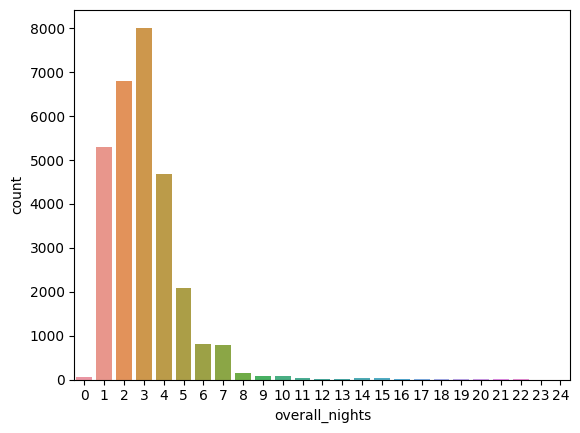

In [209]:
sns.countplot(x ="overall_nights", data= df_EDA)

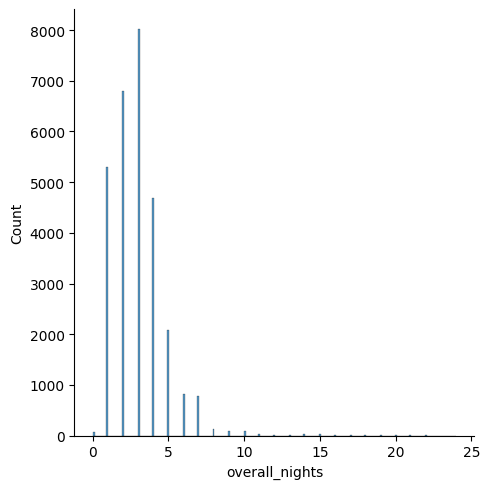

In [222]:
sns.displot(df_EDA["overall_nights"])

In [219]:
t = np.log(df_EDA["overall_nights"])

c:\Users\jannis.ebling\Miniconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


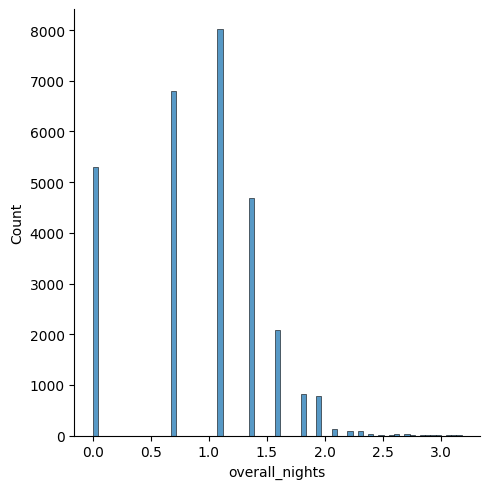

In [221]:
sns.displot(t)

In [214]:
t = pd.DataFrame(df_EDA["overall_nights_log"])
t

,overall_nights_log
9078,1.098612
36042,1.386294
5929,1.098612
6928,0.693147
34607,1.791759
...,...
6705,1.098612
2816,1.098612
5812,0.693147
4263,0.693147


C:\Users\jannis.ebling\AppData\Local\Temp\ipykernel_18200\1121625855.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(t)


OverflowError: cannot convert float infinity to integer

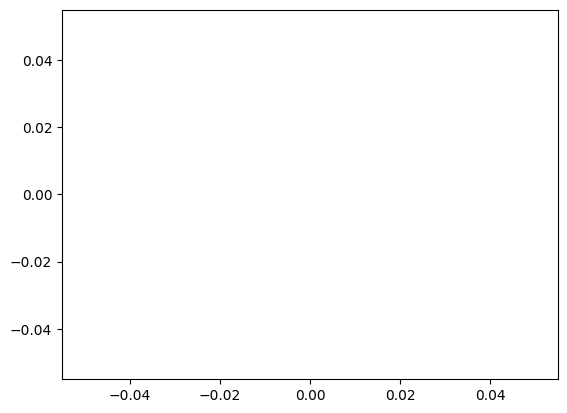

In [217]:
sns.distplot(t)